In [1]:
import os
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt

from os import path, scandir
from shutil import copyfile, rmtree

In [2]:
def show_image(img, size=(40, 6), title=None):
    plt.figure(figsize=size)
    plt.axis('off')
    
    if title is not None:
        plt.title(title)
    
    plt.imshow(img, cmap="gray", vmin=0, vmax=255)
    plt.show()

def crop_image(img):
    # argwhere will give you the coordinates of every non-zero point
    true_points = np.argwhere(img)
    # take the smallest points and use them as the top left of your crop
    tl = true_points.min(axis=0)
    # take the largest points and use them as the bottom right of your crop
    br = true_points.max(axis=0)
    # plus 1 because slice isn't inclusive
    out = img[tl[0]:br[0]+1, tl[1]:br[1]+1]
    return out

def pad_image(img, new_size):
    height, width = img.shape
    delta_h = new_size - height
    delta_w = new_size - width
    bottom = delta_h // 2
    left = delta_w // 2
    top = delta_h - bottom
    right = delta_w - left
    black = [0,0,0]
    img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=black)
    
    return img

def read_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def process_image(img, size):
    # to binary image.
    img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    
    # fit to bounding box & resize
    img = cv2.bitwise_not(img)
    img = crop_image(img)
    img = pad_image(img, max(img.shape) + 5)
    img = cv2.resize(img, size, interpolation=cv2.INTER_NEAREST)
    img = cv2.bitwise_not(img)
    
    return img

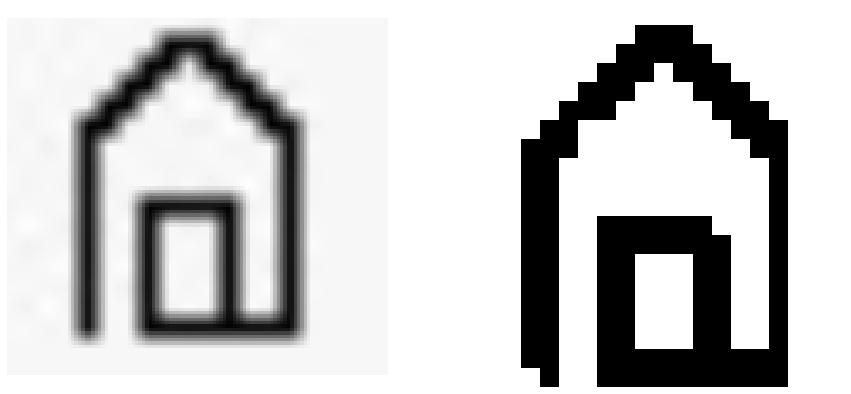

In [3]:
out_size = (20, 20)

img0 = read_image('raw_images/house2.png')
img1 = process_image(img0, out_size)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,10))
ax0.axis('off')
ax1.axis('off')
ax0.imshow(img0, cmap="gray", vmin=0, vmax=255)
ax1.imshow(img1, cmap="gray", vmin=0, vmax=255);

In [4]:
root = path.join("raw_images")
target = path.join("images")

try:
    rmtree(target)
except: 
    pass

os.mkdir(target)

for entry in os.scandir(root):
    if entry.name.endswith("png"):
        img = read_image(entry.path)
        img = process_image(img, out_size)
        cv2.imwrite(path.join(target, entry.name), img)